In [1]:
#Dataframe
import yaml
import pandas as pd
import numpy as np

pd.options.display.max_seq_items = 3000000
#Viz
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

In [2]:
def read_config(file_path='./config.yaml'):
    """Reads configuration file
    Args:
        file_path (str, optional): file path
    Returns:
        dict: Parsed configuration file
    """
    with open(file_path, "r") as f:
        return yaml.safe_load(f)

def get_data(file_path=None, nrows=None):
    """Loads data
    Args:
        file_path (str, optional): file path of dataset
            By default load data set from static web page
        nrows (int, optional): number or rows to loads from dataset
            By default loads all dataset  
    Returns:
        dataframe: output dataframe
    """
    if file_path is None:
        cfg = read_config()
        file_path = cfg['paths']['eng_dataset']
    print("Reading dataset ...")    
    return pd.read_csv(file_path,sep="\t", encoding="utf-8",
                       nrows=nrows, low_memory=False)

if __name__ == "__main__":
    data = get_data(file_path = "datas_reste_non_num_a_traiter2.csv", nrows = 1000000)
    print(f"data set shape is {data.shape}")

Reading dataset ...
data set shape is (1000000, 166)


In [3]:
data.describe()

,serving_quantity,additives_n,nutriscore_score,nova_group,ecoscore_score,product_quantity,unique_scans_n,completeness,energy-kj_100g,energy-kcal_100g,...,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g,fruits-vegetables-rate_100g
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,...,1000000.000000,1000000.000000,1000000.000000,1.000000e+06,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,75.039003,1.487512,9.583464,3.676487,62.389284,323.830751,1.554554,0.487167,992.779033,260.308431,...,9.583474,17.808615,54.841267,1.475000e+00,0.088350,0.048576,1.518440,0.027965,0.011621,36.338480
std,74.657076,1.970279,6.056827,0.764430,17.546169,513.316767,4.132578,0.201459,477.600535,177.559877,...,6.056837,0.959321,11.118884,3.108626e-15,0.173802,0.755113,1.280557,0.075117,0.003835,9.910024
min,0.000000,0.000000,-15.000000,1.000000,0.000000,0.000000,1.000000,0.200000,0.000000,0.000000,...,-15.000000,13.000000,14.000000,1.475000e+00,0.008000,0.000000,0.400000,0.002000,0.000800,25.000000
25%,42.000000,1.000000,9.000000,4.000000,58.000000,250.000000,1.000000,0.362500,957.000000,105.000000,...,9.000000,18.000000,59.350000,1.475000e+00,0.073500,0.000017,1.200000,0.028000,0.011000,25.000000
50%,57.000000,1.000000,10.000000,4.000000,71.000000,250.000000,1.000000,0.462500,957.000000,258.800000,...,10.000000,18.000000,59.350000,1.475000e+00,0.073500,0.000056,1.200000,0.028000,0.011000,45.000000
75%,57.000000,1.000000,11.000000,4.000000,71.000000,300.000000,1.000000,0.575000,957.000000,386.000000,...,11.000000,18.000000,59.350000,1.475000e+00,0.073500,0.000056,1.200000,0.028000,0.011000,45.000000
max,5000.000000,15.000000,40.000000,4.000000,125.000000,80000.000000,461.000000,1.100000,3700.000000,900.000000,...,40.000000,18.000000,59.350000,1.475000e+00,4.550000,11.800000,7.300000,75.000000,0.030000,45.000000


## Data Cleaning

In [4]:
## Changing format of object and float64 columns

new_dtypes = {}

# object -> category (if nb unique < half total nb of rows and not XXX_100g)
for col in data.columns.values:
    if data[col].dtype == 'object' :
      if len(data[col].unique()) / len(data[col]) < 0.5:
        new_dtypes[col] = 'category'
      else:
        new_dtypes[col] = 'object'

# float64 -> float32
for col in data.columns.values:
    if data[col].dtype == 'float64':
      if data[col].notna().sum()!=0: # 1% sample columns happening to be all null 
        new_dtypes[col] = 'float32'

# int64 -> int8
for col in data.columns.values:
    if data[col].dtype == 'int64':
        new_dtypes[col] = 'int8'
        
print(new_dtypes)

{'code': 'object', 'url': 'object', 'product_name': 'object', 'abbreviated_product_name': 'category', 'generic_name': 'category', 'quantity': 'category', 'packaging_en': 'category', 'packaging_text': 'category', 'brands': 'category', 'categories_en': 'category', 'origins_en': 'category', 'manufacturing_places': 'category', 'labels_en': 'category', 'emb_codes': 'category', 'first_packaging_code_geo': 'category', 'cities_tags': 'category', 'purchase_places': 'category', 'stores': 'category', 'countries_en': 'category', 'ingredients_text': 'category', 'ingredients_analysis_tags': 'category', 'allergens': 'category', 'traces_en': 'category', 'serving_size': 'category', 'no_nutrition_data': 'category', 'additives_en': 'category', 'nutriscore_grade': 'category', 'pnns_groups_1': 'category', 'pnns_groups_2': 'category', 'food_groups_en': 'category', 'states_en': 'category', 'brand_owner': 'category', 'ecoscore_grade': 'category', 'nutrient_levels_tags': 'category', 'owner': 'category', 'data_

In [5]:
## Forcing XXX_100g and nutriscore columns to 'float32' and nova to 'object'

X_100g_cols = data.columns[data.columns.str.contains('_100g')]
for col in X_100g_cols:
    new_dtypes[col] = 'float32'

In [6]:
desc = data.describe(include='all')

In [7]:
# Checking columns in df

for i, c in enumerate(data.columns):
    print('\n'+c if i % 6 == 0 else c, end=' | ')


code | url | product_name | abbreviated_product_name | generic_name | quantity | 
packaging_en | packaging_text | brands | categories_en | origins_en | manufacturing_places | 
labels_en | emb_codes | first_packaging_code_geo | cities_tags | purchase_places | stores | 
countries_en | ingredients_text | ingredients_analysis_tags | allergens | traces_en | serving_size | 
serving_quantity | no_nutrition_data | additives_n | additives_en | nutriscore_score | nutriscore_grade | 
nova_group | pnns_groups_1 | pnns_groups_2 | food_groups_en | states_en | brand_owner | 
ecoscore_score | ecoscore_grade | nutrient_levels_tags | product_quantity | owner | data_quality_errors_tags | 
unique_scans_n | popularity_tags | completeness | main_category_en | image_small_url | image_ingredients_small_url | 
image_nutrition_small_url | energy-kj_100g | energy-kcal_100g | energy_100g | energy-from-fat_100g | fat_100g | 
saturated-fat_100g | butyric-acid_100g | caproic-acid_100g | caprylic-acid_100g | capric-

## Features Selection

1.1 Empty Columns 

In [8]:


# Checking nb of not null values in the columns

nb_not_null = pd.DataFrame((~data.isna()).sum(axis =0), columns=['nb'])
nb_not_null.sort_values(by=['nb'], axis=0, ascending=True, inplace=True)
nb_not_null.T.head(150)



,abbreviated_product_name,packaging_text,no_nutrition_data,owner,origins_en,data_quality_errors_tags,first_packaging_code_geo,cities_tags,manufacturing_places,generic_name,...,maltose_100g,polyunsaturated-fat_100g,alpha-linolenic-acid_100g,eicosapentaenoic-acid_100g,docosahexaenoic-acid_100g,omega-6-fat_100g,linoleic-acid_100g,arachidonic-acid_100g,omega-3-fat_100g,fruits-vegetables-rate_100g
nb,6039,10878,16817,33713,53620,53682,58494,62920,69689,73945,...,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000


In [9]:
# Displaying a table with bins
mask = pd.cut(nb_not_null['nb'], [-1,0,5,10,100,300,10000,2000000]) # 
mask.value_counts(normalize=False, sort=False)



(-1, 0]               0
(0, 5]                0
(5, 10]               0
(10, 100]             0
(100, 300]            0
(300, 10000]          1
(10000, 2000000]    165
Name: nb, dtype: int64

In [10]:
# Changing the name of some of the columns

data.rename(columns={'nutriscore_score': 'nutriscore',
                   'nutriscore_grade': 'nutrigrade',
                    'traces_en' : 'traces',
                     'labels_en' : 'labels',
                   'pnns_groups_1': 'pnns1',
                   'pnns_groups_2': 'pnns2',
                   'nutrition_score_fr_100g':'nutriscore_fr'},
          inplace=True)



In [11]:
# Changing the name of some of the columns

data.rename(columns={'countries_en': 'countries',
                     'packaging_en' : 'packaging',
                   'additives_en': 'additives',
                   'main_category_en': 'main_category',
                   'categories_en': 'categories',
                   'nutrition_score_fr_100g':'nutriscore_fr'},
          inplace=True)

## Redundancy of features 

In [12]:


# Comparing filled values in two columns
''' returns indices where both are filled, or first only, or second, or none'''

def comp_df (df, col1, col2, print_option):
  m_both = (~df[[col1,col2]].isna()).sum(axis=1)==2 # mask for both cells filled
  m_one = (~df[[col1,col2]].isna()).sum(axis=1)==1 # mask for only one cell filled
  m_col1 = m_one & ~df[col1].isna() # mask for only col1 cell filled
  m_col2 = m_one & ~df[col2].isna() # mask for only col2 cell filled
  mnone = ~m_one & ~m_both
  ind_both = df.index[m_both].to_list()
  ind_col1 = df.index[m_col1].to_list()
  ind_col2 = df.index[m_col2].to_list()
  ind_none = df.index[mnone].to_list()
  if print_option :
    print("nb rows both filled: ", len(ind_both))
    print("nb rows with only", col1, "filled: ", len(ind_col1))
    print("nb rows with only", col2, "filled: ", len(ind_col2))
    print("nb rows not filled: ", len(ind_none))
  else:
    pass
  return(ind_both, ind_col1, ind_col2, ind_none)



In [13]:


# Printing result of comparison in each case:

li_col = ['packaging']
for c in li_col:
  c1 = c
  c2 = c+'_text'
  print('COLUMN', c,':')
  t_ind = comp_df(data, c1, c2, True)
  data.loc[t_ind[1], [c1,c2]] = np.nan



COLUMN packaging :
nb rows both filled:  10878
nb rows with only packaging filled:  989122
nb rows with only packaging_text filled:  0
nb rows not filled:  0


In [14]:
data.filter( like = 'packaging')

,packaging,packaging_text,first_packaging_code_geo
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,NaN,NaN,NaN
...,...,...,...
999995,NaN,NaN,NaN
999996,NaN,NaN,NaN
999997,NaN,NaN,NaN
999998,NaN,NaN,NaN


In [15]:
data.filter(like = 'brands')

,brands
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
999995,NaN
999996,NaN
999997,NaN
999998,adler


In [16]:
data.drop(columns = 'packaging_text',inplace = True)

In [17]:
# Checking the remaining columns

for i, c in enumerate(data.columns):
    print('\n'+c if i % 6 == 0 else c, end=' | ')


code | url | product_name | abbreviated_product_name | generic_name | quantity | 
packaging | brands | categories | origins_en | manufacturing_places | labels | 
emb_codes | first_packaging_code_geo | cities_tags | purchase_places | stores | countries | 
ingredients_text | ingredients_analysis_tags | allergens | traces | serving_size | serving_quantity | 
no_nutrition_data | additives_n | additives | nutriscore | nutrigrade | nova_group | 
pnns1 | pnns2 | food_groups_en | states_en | brand_owner | ecoscore_score | 
ecoscore_grade | nutrient_levels_tags | product_quantity | owner | data_quality_errors_tags | unique_scans_n | 
popularity_tags | completeness | main_category | image_small_url | image_ingredients_small_url | image_nutrition_small_url | 
energy-kj_100g | energy-kcal_100g | energy_100g | energy-from-fat_100g | fat_100g | saturated-fat_100g | 
butyric-acid_100g | caproic-acid_100g | caprylic-acid_100g | capric-acid_100g | lauric-acid_100g | myristic-acid_100g | 
palmitic-acid

## Categorial Features

#### 2.0 Missing value

In [18]:

cols = ['brands', 'packaging', 'countries', 'labels', 'traces', 'additives',
        'allergens', 'main_category', 'categories','pnns2', 'pnns1']


FileNotFoundError: [Errno 2] No such file or directory: '/image/C_2_0_cat_nb_vs_freq_thr.png'

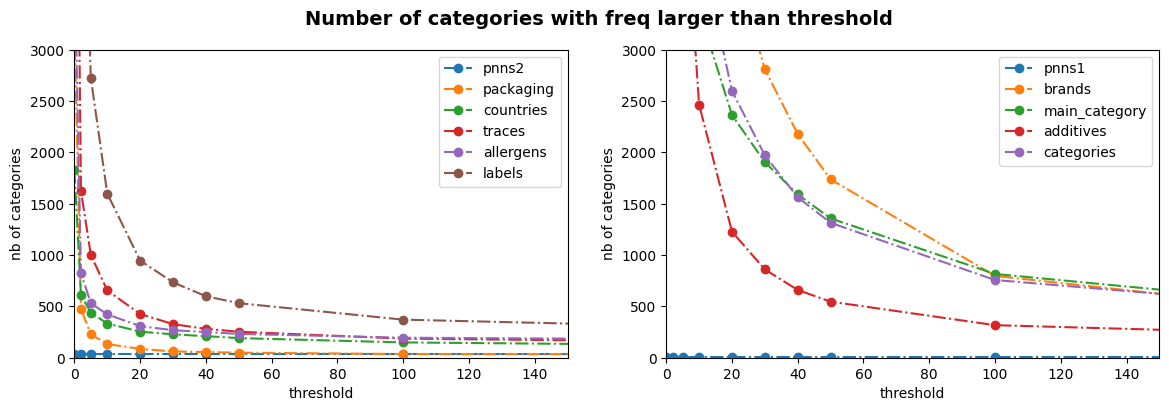

In [19]:
# Checking lower number of occurences in cat columns

fig, axs = plt.subplots(1,2)
thresh = [0,2,5,10,20,30,40,50,100,250,500,1000,5000]

for i, c in enumerate(['pnns2', 'packaging', 'countries',\
                      'traces',  'allergens', 'labels']):
    ser = data[c].value_counts()
    axs[0].plot(thresh, np.array([len(ser[ser>t]) for t in thresh])+(i*30),
             label=c, marker='o', ls='-.')
    
for i, c in enumerate(['pnns1', 'brands','main_category','additives',\
                      'categories']):
    ser = data[c].value_counts()
    axs[1].plot(thresh, np.array([len(ser[ser>t]) for t in thresh])+(i*30),
             label=c, marker='o', ls='-.')

[(ax.set_xlabel('threshold'),ax.set_ylabel('nb of categories')) for ax in axs];
[ax.set(xlim=(0,150), ylim=(0,3000)) for ax in axs];
[ax.legend() for ax in axs];

fig.suptitle('Number of categories with freq larger than threshold',
             fontweight='bold', fontsize=14)
plt.gcf().set_size_inches(14,4)
plt.savefig('/image/C_2_0_cat_nb_vs_freq_thr.png', dpi=400);
plt.show()

In [24]:

def print_comp_info(col=li_col):
  c1 = col
  c2 = c1+'_tags'
  # Comparing content of 2 columns, print info and returns indexes 
  t_ind = comp_df(data, c1, c2, True)
  # Displaying a random sample of cells:
  '''- when col1 only is filled
  - when col2 only is filled
  - when both columns are filled'''
  display_side_by_side(df.loc[t_ind[1],[c1, c2]]\
                       .sample(5 if len(t_ind[1])>5 else len(t_ind[1])),
                      df.loc[t_ind[2], [c1, c2]]\
                       .sample(5 if len(t_ind[2])>5 else len(t_ind[2])),
                      df.loc[t_ind[0], [c1, c2]]\
                       .sample(5 if len(t_ind[0])>5 else len(t_ind[0])))



### 2.1 Features with list

In [32]:


# Replace - by ' ' in  columns
for c in cols:
    data[c] = data[c].replace([r'[-]'], [' '], regex=True)

In [33]:


# Printing columns containing lists or not

for c in cols:
    n_lists = data[c].str.contains(',').sum()
    if data[c].str.contains(',').sum():
        print(c.upper()+': ' + str(n_lists) + ' lists')
    else:
        print(c + ': - no list - ')



BRANDS: 71360 lists
PACKAGING: 5813 lists
COUNTRIES: 27459 lists
LABELS: 174606 lists
TRACES: 52080 lists
ADDITIVES: 215678 lists
ALLERGENS: 57280 lists
main_category: - no list - 
CATEGORIES: 475180 lists
pnns2: - no list - 
pnns1: - no list - 


In [34]:


# Splitting categories in 2 groups: containing lists, or not

multi_cat_cols = ['brands', 'packaging', 'countries','labels',
                  'traces','additives','allergens','categories']

cat_cols = ['main_category', 'pnns1', 'pnns2']




### Splitting, extracting main, dropping less frequent values

categories with lists

In [30]:


# Setting to nan categories with less than freq 15 | returning tuples for others  

def filter_main_categories(ser,n):
    ser_m = ser
    flat_values = pd.Series([item for sublist in ser.str.split(',')\
                            for item in sublist])
    cat_occ = flat_values.value_counts()
    to_keep = cat_occ[cat_occ>n].index
    ser_m = ser_m.apply(lambda x: tuple([s.strip() for s in x.split(',')\
                                            if s.strip() in to_keep]))
    return ser_m



categories without lists

In [36]:
n = 15

In [48]:


# Printing number of unique values of category columns

print('Number of categories: ',[(cat+' ('+str(data[cat].nunique())+') ') for cat in cols])



before:  ['brands (89584) ', 'packaging (3215) ', 'countries (1767) ', 'labels (41364) ', 'traces (7497) ', 'additives (69293) ', 'allergens (3852) ', 'main_category (2703) ', 'categories (52471) ', 'pnns2 (40) ', 'pnns1 (11) ']


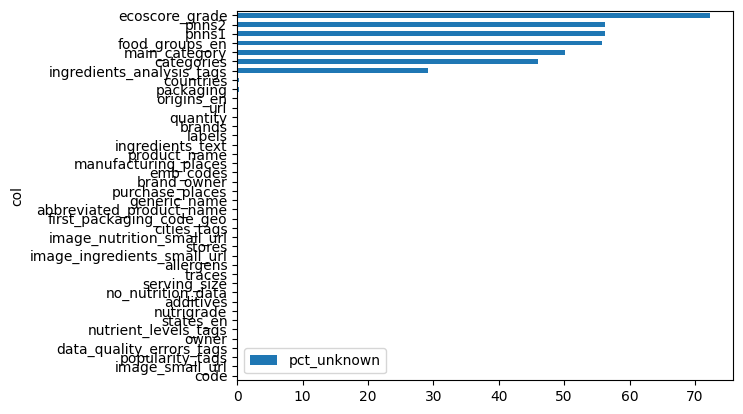

In [52]:
# Percentage of 'unknown' in categorical data

tot = data.shape[0]
ser = pd.DataFrame([[c, data[c].str.contains('unknown').sum()*100/tot] \
                 for c in data.select_dtypes('object').columns],
                 columns=['col', 'pct_unknown']).set_index('col')
ser.sort_values('pct_unknown').plot.barh()
plt.savefig('image/C_2_0_unknown_cat_values.png', dpi=400);
plt.show()


### 2.1 'product_name' column

In [58]:


# Replacing invalid names (1 or 0 characters) with np.NaN


data.loc[data[data['product_name'].str.len()<2].index,'product_name'] = np.nan


### 2.2 'code' column

In [61]:


# Verification of barcodes (EAN-13, EAN-8 and UPC (12-digit) format)
# Creation of a new column : 'code_val' (bool) barcode valid or not

data.insert(1,'code_val', data['code'].apply(is_valid))
print("nb of valid codes: ", data['code_val'].sum())
print("nb of invalid codes: ", (~df['code_val']).sum())
print("pctage of valid codes: {:.2f}%".format(df['code_val'].sum()*100/df.shape[0]))



NameError: name 'is_valid' is not defined